# Naive bayes

## Categorical NaiveBayes

In [1]:
# importing libraries

import pandas as pd
import numpy as np

from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder

### Dataset Loading

Dataset Download link: [Play Tennis](https://drive.google.com/file/d/1FyL3UaV9H-5ZkXHtL8GTVy7itREzPXhy/view?usp=drive_link)

In [36]:
# loading dataset

tennis = pd.read_csv("../datasets/play_tennis.csv")

In [37]:
print("shape of data:", tennis.shape)
tennis.head()

shape of data: (14, 6)


,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [38]:
X = tennis.drop(['day', 'play'], axis = 1)
y = tennis['play']

In [39]:
le_x = {}

for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_x[col] = le

le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [40]:
X = X.to_numpy()

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [42]:
print(f"train size: {x_train.shape[0]}")
print(f"test size: {x_test.shape[0]}")

train size: 12
test size: 2


In [43]:
model = CategoricalNB()
model.fit(x_train, y_train)

CategoricalNB()

In [44]:
# prediction

print(f"Original: {y_test[0]}")
print(f"Prediction: {model.predict([x_test[0]])[0]}")

Original: 1
Prediction: 1


In [45]:

print(f"Original: {y_test[1]}")
print(f"Prediction: {model.predict([x_test[1]])[0]}")

Original: 1
Prediction: 0


## Guassian Naivebayes

In [57]:
from sklearn.datasets import load_breast_cancer

In [58]:
data = load_breast_cancer()

print("Feature names")
print(data.feature_names)

print("target names")
print(data.target_names)

Feature names
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
target names
['malignant' 'benign']


In [63]:
x, y = data.data, data.target
print(x.shape)
print(y.shape)

(569, 30)
(569,)


In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [71]:
print("train size:", x_train.shape[0])
print("test size:", x_test.shape[0])

train size: 455
test size: 114


In [72]:
# guassinaNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [75]:
# test scores

y_test_pred = gnb.predict(x_test)


print(f"accuracy_score: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"precision_score: {precision_score(y_test, y_test_pred):.4f}")
print(f"recall_score: {recall_score(y_test_pred, y_test):.4f}")
print(f"f1 score: {f1_score(y_test, y_test_pred):.4f}")

accuracy_score: 0.9737
precision_score: 0.9595
recall_score: 0.9595
f1 score: 0.9793


In [77]:
# some predictions

print("original:", y_test[78])
print("prediction:", gnb.predict([x_test[78]])[0])

original: 1
prediction: 1


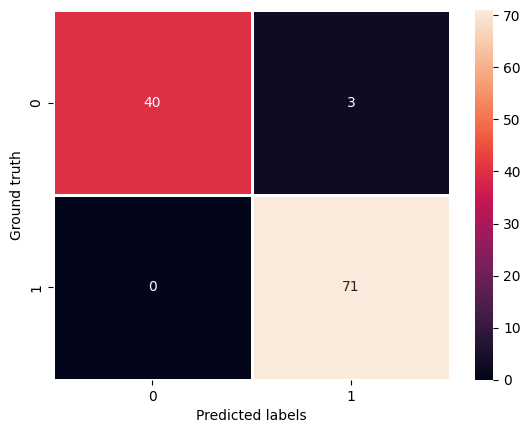

In [79]:
# confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_true=y_test, y_pred= y_test_pred)
sns.heatmap(mat, linewidths=1, annot=True)
plt.xlabel("Predicted labels")
plt.ylabel("Ground truth")
plt.show()